# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

In [1]:
# Your code here:

!pip install googletrans==4.0.0-rc1
from googletrans import Translator

def google_trans(sentence, target_lang):
    """This function translates a given sentence to the required target language. It requires two inputs: sentence (to be translated) and target_lang (target language)"""
    translator = Translator()
    translated = translator.translate(sentence, dest=target_lang)
    print(translated.text)

Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

In [2]:
sentence = "Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."
target_lang = "es"

google_trans(sentence, target_lang)

Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.


2. Now translate it from Spanish to Chinese
2.5pts

In [3]:
#Your code here:
sentence = "Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir."
target_lang = "zh-cn"

google_trans(sentence, target_lang)

通过为平等权利而努力的人类职业。


3. Now translate it from Chinese back to English.
2.5pts

In [4]:
#Your code here:
sentence = "通过为平等权利而努力的人类职业。"
target_lang = "en"

google_trans(sentence, target_lang)

Human occupations that work hard for equal rights.


4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Haz una carrera de la humanidad. Comprométete con la noble lucha por los derechos iguales. Te convertirás en una mejor persona, harás de tu país una nación más grande y de este mundo un lugar mejor para vivir.

Sp to Chinese: 以人道主义为事业。致力于为平等权利而进行的高尚斗争。你将成为一个更好的人，使你的国家成为一个更伟大的民族，并让这个世界成为一个更美好的居住地

Chinese to Eng: Make humanitarianism your cause. Dedicate yourself to the noble struggle for equal rights. You will become a better person, make your country a greater nation, and turn this world into a better place to live.

5. Describe the difference in quality and features of output:
2.5pts

Your answer here:

The translation thorugh the function are too literal because of which there was a loss of context and meaning while going from spanish to chinese and ultimately from chinese to english. The final output does not make much sense and lost the key concept behind the quote.
In contrast the ChatGPT output kept the essence of the initial quote even though the words might differ. This shows that ChatGPT did not jsut do a literal translation of the words thorugh the various iterations but also focused on the meaning and tried to retain through the various translations.

 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

[('I', 180), ('people', 80), ('going', 73), ('We', 70), ('want', 67), ('dont', 63), ('They', 63), ('But', 58), ('know', 58), ('You', 55), ('country', 43), ('ballots', 43), ('votes', 41), ('election', 40), ('back', 40), ('go', 38), ('said', 37), ('state', 35), ('one', 34), ('like', 32)]


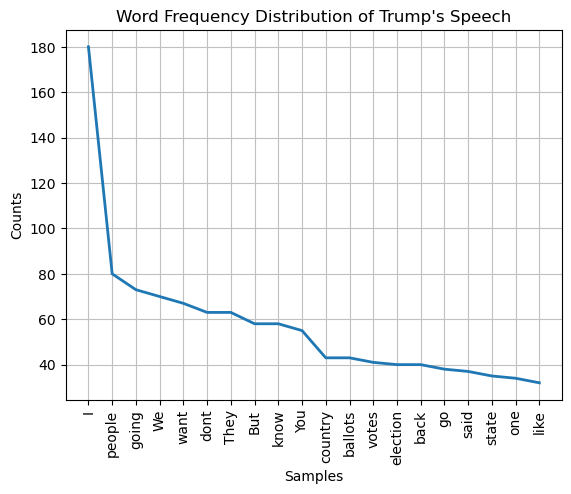

<Axes: title={'center': "Word Frequency Distribution of Trump's Speech"}, xlabel='Samples', ylabel='Counts'>

In [11]:
# Your code here:

import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Fetch the content from the URL
url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract Trump's speech
speech_text = soup.find('div', class_='storytext storylocation linkLocation').get_text()
speech_start = speech_text.find("Well, thank you very much. This is incredible")
speech_end = speech_text.find("This is incredible. Thank you very much. Thank you.")
speech = speech_text[speech_start:speech_end].strip()

#print(speech)

# Remove punctuation and tokenize the speech
speech = re.sub('[^a-zA-Z0-9 ]', '', speech)
tokens = word_tokenize(speech)

#print(speech)
#print(tokens)

# Load NLTK's stopwords
stopwords = nltk.corpus.stopwords.words("english")

#print(stopwords)

# Remove stopwords from the tokens
filtered_tokens = []
for word in tokens:
    if not word in stopwords:
        filtered_tokens.append(word)
    else:
        pass

#fdist = FreqDist(filtered_tokens)
#y = fdist.most_common(20)
#print(y)
#print(fdist.plot(20))

# Add additional stopwords
new_stops = ['And', 'get' , 'got' , 'but']
stopwords.extend(new_stops)

# Remove additional stopwords from the tokens
filtered_tokens2 = []
for word in filtered_tokens:
    if not word in stopwords:
        filtered_tokens2.append(word)
    else:
        pass

# Visualize the word frequency distribution
fdist2 = FreqDist(filtered_tokens2)
z = fdist2.most_common(20)

plt.title("Word Frequency Distribution of Trump's Speech")
#plt.xlabel("Words")
#plt.ylabel("Frequency")
print(z)
fdist2.plot(20)


#z = fdist2.most_common(20)

#plt.title("Word Frequency Distribution of Trump's Speech")

#print(z)
#fdist2.plot(20)

#fdist2.xlabel("Words")
#plt.ylabel("Frequency")

8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [14]:
#Your code and answer here:

import nltk
from nltk import bigrams
from nltk.tokenize import word_tokenize

with open("trump_speeches.txt", 'r', encoding='utf-8') as file:
    raw_speech = file.read()
#print(raw_speech)
    raw_speech = re.sub('[^a-zA-Z0-9 ]', '', speech)

def find_trump_loves_bigrams(text):
    """This function finds bigrams with the word love in them"""
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    
    # Generate bigrams from the tokenized words
    bigram_list = list(bigrams(words))
    
    # Filter bigrams that contain the word 'love'
    love_bigrams = [pair for pair in bigram_list if 'love' in pair]
    
    # Count occurrences of each bigram
    bigram_counter = Counter(love_bigrams)
    
    # Return the 10 most common bigrams involving 'love'
    return bigram_counter.most_common(10)

# Find the top 10 love-related bigrams
top_love_bigrams = find_trump_loves_bigrams(raw_speech)

# Print the results
print("Top 10 most common things Donald Trump loves (bigrams):")
print(top_love_bigrams)

Top 10 most common things Donald Trump loves (bigrams):
[(('we', 'love'), 4), (('i', 'love'), 4), (('id', 'love'), 2), (('love', 'to'), 2), (('extraordinary', 'love'), 2), (('love', 'for'), 2), (('love', 'the'), 2), (('love', 'you'), 2), (('love', 'it'), 1), (('love', 'thats'), 1)]


In [60]:
#Your code and answer here:

import nltk
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter
import re

# Define a list of words to ignore in bigrams
ignore_words = {"id", "to", "for", "the", "it", "thats", "and", "our", "this", "their", "they", "my", "people", "them", "that"}

def find_trump_loves_bigrams(text):
    """This function finds bigrams with the word love in them, ignoring certain words."""
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    
    # Filter out the ignore words
    filtered_words = [word for word in words if word not in ignore_words]
    
    # Generate bigrams from the filtered words
    bigram_list = list(bigrams(filtered_words))
    
    # Filter bigrams that contain the word 'love'
    love_bigrams = [pair for pair in bigram_list if 'love' in pair]
    
    # Count occurrences of each bigram
    bigram_counter = Counter(love_bigrams)
    
    # Return the 10 most common bigrams involving 'love'
    return bigram_counter.most_common(10)

# Load and clean the speeches text file
with open("trump_speeches.txt", 'r', encoding='utf-8') as file:
    raw_speech = file.read()

# Remove non-alphanumeric characters except spaces
raw_speech = re.sub('[^a-zA-Z0-9 ]', '', raw_speech)

# Find the top 10 love-related bigrams
top_love_bigrams = find_trump_loves_bigrams(raw_speech)

# Print the results
print("Top 10 most common things Donald Trump loves (bigrams):")
print(top_love_bigrams)

Top 10 most common things Donald Trump loves (bigrams):
[(('i', 'love'), 128), (('we', 'love'), 43), (('love', 'you'), 34), (('love', 'i'), 13), (('love', 'country'), 12), (('love', 'me'), 6), (('love', 'china'), 5), (('would', 'love'), 5), (('love', 'all'), 5), (('love', 'doing'), 4)]


In [55]:
from collections import Counter
import re

# Load the speeches text file
with open("trump_speeches.txt", 'r', encoding='utf-8') as file:
    raw_speech = file.read()
#print(raw_speech)
    text = re.sub('[^a-zA-Z0-9 ]', '', speech)

# Find all occurrences of "I love" and "we love" followed by a word
i_love_matches = re.findall(r'\bI love\s+(\w+)', text, re.IGNORECASE)
we_love_matches = re.findall(r'\bwe love\s+(\w+)', text, re.IGNORECASE)

# Count the frequency of each word following "I love" and "we love"
i_love_counter = Counter(i_love_matches)
we_love_counter = Counter(we_love_matches)

# Get the 10 most common things Trump says "I love"
most_common_i_love = i_love_counter.most_common(10)

# Get the 10 most common things Trump says "we love"
most_common_we_love = we_love_counter.most_common(10)

# Print the results
print("Most common things following 'I love':")
for thing, count in most_common_i_love:
    print(f"{thing}: {count}")

print("\nMost common things following 'we love':")
for thing, count in most_common_we_love:
    print(f"{thing}: {count}")

Most common things following 'I love':
the: 1
Georgia: 1
you: 1
Pennsylvania: 1

Most common things following 'we love':
Trump: 1
the: 1
you: 1
our: 1


9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

In [59]:
#Your code and answer here:

# List of countries to search for
countries = ["China", "Mexico", "Russia", "Iran", "Iraq", "Syria", "North Korea", "South Korea", "Japan", "Saudi Arabia", "Libya", "Cuba", "Afghanistan", "Germany", "France", "Canada", "Israel", "Egypt"]

with open("trump_speeches.txt", 'r', encoding='utf-8') as file:
    raw_speech = file.read()
#print(raw_speech)
    words_speech = word_tokenize(raw_speech)
    
country_mentions = []
for country in words_speech:
    if country in countries:
        country_mentions.append(country)
    else:
        pass
#print(country_mentions)


# Count occurrences of each country
country_counter = Counter(country_mentions)
#print(country_counter)


# Print the results
print(f"Top 5 countries mentioned by Donald Trump (excluding America):") 
print(country_counter.most_common(5))

Top 5 countries mentioned by Donald Trump (excluding America):
[('China', 200), ('Mexico', 155), ('Iran', 89), ('Israel', 82), ('Iraq', 69)]



 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [25]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

In [17]:
# Your code here:

import re
from collections import Counter
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize

def analyze_speech(text):
    """This function analyzes a given text, identifying most common words, bigrams, trigrams, and phrases against the common phrases group"""
    
    # Remove punctuation and common stop words
    text = re.sub('[^a-zA-Z0-9 ]', '', text)
    
    # Tokenize the text into sentences
    sentences = sent_tokenize(text.lower())
    
    # Tokenize the text into words
    raw_words = word_tokenize(text.lower())

    # Load NLTK's stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    
    #print(stopwords)
    
    # Remove stopwords from the tokens
    words1 = []
    for word in raw_words:
        if not word in stopwords:
            words1.append(word)
        else:
            pass
    
    # Add additional stopwords
    new_stops = ['And', 'the' , 'to' , 'a', 'of', 'have', 'that']
    stopwords.extend(new_stops)
    
    # Remove additional stopwords from the tokens
    words = []
    for word in words1:
        if not word in stopwords:
            words.append(word)
        else:
            pass
    
    # Create n-grams (bigrams and trigrams)
    bigrams = list(ngrams(words, 2))
    trigrams = list(ngrams(words, 3))
    
    # Count occurrences of words, bigrams, and trigrams
    word_counter = Counter(words)
    bigram_counter = Counter(bigrams)
    trigram_counter = Counter(trigrams)
    
    # Find common phrases like "many people are saying" or "believe me"
    common_phrases = ["many people are saying", "crooked hillary", "radical islamic", "believe me", "fake news"]
    
    phrase_counts = {phrase: len(phrase) for phrase in common_phrases}
    
    # Return the most common words, bigrams, trigrams, and specific phrases
    return {
        'common_words': word_counter.most_common(10),
        'common_bigrams': bigram_counter.most_common(10),
        'common_trigrams': trigram_counter.most_common(10),
        'common_phrases': phrase_counts
    }

# Read the file content
with open('trump_speeches.txt', 'r', encoding='utf-8') as file:
    raw_speech = file.read()

# Analyze the speech content
analysis_results = analyze_speech(content)

# Print the results
print("Most Common Words:")
for word, count in analysis_results['common_words']:
    print(f"{word}: {count} times")

print("\nMost Common Bigrams:")
for bigram, count in analysis_results['common_bigrams']:
    print(f"{bigram}: {count} times")

print("\nMost Common Trigrams:")
for trigram, count in analysis_results['common_trigrams']:
    print(f"{trigram}: {count} times")

print("\nSpecific Phrase Counts:")
for phrase, count in analysis_results['common_phrases'].items():
    print(f"{phrase}: {count} times")

"""Analysis - The frequency of these phrases supports the Vox article's analysis of Trump's speech style as employing salesmanship techniques. 
His use of repetition, branding, and appeals to trust are evident in these phrases, which serve to emphasize key messages and shape audience perceptions. 
These techniques help Trump create memorable soundbites that resonate with his supporters and reinforce his core messaging themes."""

Most Common Words:
going: 2052 times
know: 1293 times
people: 1264 times
dont: 970 times
im: 775 times
said: 769 times
want: 753 times
theyre: 713 times
great: 669 times
get: 630 times

Most Common Bigrams:
('dont', 'know'): 195 times
('im', 'going'): 160 times
('dont', 'want'): 153 times
('theyre', 'going'): 138 times
('youre', 'going'): 128 times
('united', 'states'): 108 times
('going', 'get'): 96 times
('going', 'make'): 92 times
('going', 'win'): 89 times
('going', 'happen'): 81 times

Most Common Trigrams:
('make', 'america', 'great'): 48 times
('going', 'take', 'care'): 39 times
('ive', 'ever', 'seen'): 20 times
('make', 'country', 'great'): 18 times
('going', 'make', 'america'): 18 times
('going', 'build', 'wall'): 18 times
('dont', 'even', 'know'): 18 times
('going', 'get', 'rid'): 17 times
('dont', 'know', 'theyre'): 16 times
('going', 'happen', 'going'): 16 times

Specific Phrase Counts:
many people are saying: 22 times
crooked hillary: 15 times
radical islamic: 15 times
bel

## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

In [71]:
!pip install googletrans==4.0.0-rc1

from googletrans import Translator
import csv
import random

# Initialize translator
translator = Translator()

# Fake dataset of previous reports for anomaly detection
PREVIOUS_DATA = {
    'grower1': {'price': 100, 'production': 500, 'quality': 'good'},
    'grower2': {'price': 90, 'production': 300, 'quality': 'average'},
    # More data...
}

# Emergency call keywords to detect urgent health calls
EMERGENCY_KEYWORDS = ['child', 'emergency', 'infant', 'health', 'doctor']

# Word confusion mapping (e.g., 'mango' and 'child')
CONFUSION_WORDS = {
    'enfant': 'mango',  # French "child" may be confused with "mango"
}

# Manual Bambara to French translation fallback (for known phrases)
BAMBARA_TO_FRENCH = {
    "dòn ni sèn tè": "La récolte n'est pas bonne",  # "The harvest is bad"
    "dòn ni sèn ka sè": "La récolte est bonne",     # "The harvest is good"
    "se fa nè": "Le prix est bas",                 # "The price is low"
    "Ne ye musikɛla ye min bɛ Mango Mali ɲini": "Je suis un musicien à la recherche de Mango Mali", # "I'm a musician looking for Mango Mali"
    "Denmisɛnw ka kɛnɛyako gɛlɛya": "La crise sanitaire des enfants"               # "Infant health problem"
    # Add more mappings as needed
}

# Helper functions

def translate_bambara_to_french(bambara_text):
    """
    Translate Bambara input to French using googletrans or manual fallback.
    """
    if bambara_text in BAMBARA_TO_FRENCH:
        return BAMBARA_TO_FRENCH[bambara_text]
    
    try:
        # If translation fails or Bambara isn't supported, treat it as French
        result = translator.translate(bambara_text, src='fr', dest='fr')
        return result.text
    except Exception as e:
        print(f"Error in Bambara to French translation: {e}")
        return bambara_text  # Return original if translation fails

def translate_french_to_english(french_text):
    """
    Use Googletrans to translate French text to English, with error handling.
    """
    try:
        result = translator.translate(french_text, src='fr', dest='en')
        # Ensure that a valid result was returned
        if result and result.text:
            return result.text
        else:
            raise ValueError("Translation returned None")
    except Exception as e:
        print(f"Error in French to English translation: {e}")
        # Return the original French text with a warning if translation fails
        return f"[Translation failed] {french_text}"

def detect_emergency_call(text):
    """
    Detect if the call is related to an emergency situation.
    """
    for keyword in EMERGENCY_KEYWORDS:
        if keyword in text.lower():
            return True
    return False

def resolve_confusion(french_text):
    """
    Resolve known confusions between words like 'child' and 'mango'.
    """
    for french_word, correct_word in CONFUSION_WORDS.items():
        french_text = french_text.replace(french_word, correct_word)
    return french_text

def collect_data_and_detect_fraud(grower_id, price, production, quality):
    """
    Detect fraud in the reported data based on historical trends and anomalies.
    """
    prev_data = PREVIOUS_DATA.get(grower_id)
    if not prev_data:
        return False  # No historical data, can't detect fraud
    
    # Basic fraud detection logic (for demo purposes)
    if abs(prev_data['price'] - price) > 20 or abs(prev_data['production'] - production) > 100:
        return True
    return False

# Add a set of keywords related to the music production company "Mango Mali"
MUSIC_KEYWORDS = ['mango mali', 'music', 'album', 'concert', 'song', 'musician']

def detect_music_related_call(text):
    """
    Detect if the call is related to music production.
    """
    for keyword in MUSIC_KEYWORDS:
        if keyword.lower() in text.lower():
            return True
    return False

# Main process

def process_call():
    """
    The main function that handles a call, processes input, and saves to CSV.
    """
    # Step 1: Get phone number input
    phone_number = input("Enter the caller's phone number: ")

    # Step 2: Manually enter Bambara text (since we're not using audio input)
    bambara_input = input("Enter Bambara input (simulated): ")

    # Step 3: Translate Bambara to French using manual or googletrans fallback
    french_text = translate_bambara_to_french(bambara_input)
    print(f"Translated to French: {french_text}")

    # Step 4: Check for music-related call (fans calling for Mango Mali)
    if detect_music_related_call(french_text):
        print("Music-related call detected! Informing the caller they have reached the wrong number.")
        return  # Redirecting call, no further processing

    # Step 5: Check for emergency call
    if detect_emergency_call(french_text):
        print("Emergency detected! Redirecting call...")
        return  # Redirecting call, no further processing

    # Step 6: Resolve known word confusion (mango vs child)
    french_text = resolve_confusion(french_text)

    # Step 7: Translate French to English using googletrans, handle failed translation
    english_text = translate_french_to_english(french_text)
    print(f"Translated to English: {english_text}")

    # Simulate data collection
    grower_id = 'grower1'  # This would be determined dynamically
    price = random.randint(80, 150)
    production = random.randint(200, 600)
    quality = 'good' if random.random() > 0.2 else 'bad'

    # Step 8: Detect fraudulent reports
    is_fraud = collect_data_and_detect_fraud(grower_id, price, production, quality)
    if is_fraud:
        print("Fraud detected in the report!")
    
    # Step 9: Save the processed data to a CSV
    with open('market_report_new.csv', mode='a', newline='') as file:  # Changed file name
        writer = csv.writer(file)
        # Write data to CSV with translated English text or failure message
        writer.writerow([grower_id, price, production, quality, english_text])

    print("Data saved to CSV.")

In [75]:
#Normal grower report
process_call()

Enter the caller's phone number:  12345
Enter Bambara input (simulated):  dòn ni sèn ka sè


Translated to French: La récolte est bonne
Error in French to English translation: the JSON object must be str, bytes or bytearray, not NoneType
Translated to English: [Translation failed] La récolte est bonne
Data saved to CSV.


In [74]:
# Engant vs Mango
process_call()

Enter the caller's phone number:  12345
Enter Bambara input (simulated):  enfant


Translated to French: enfant
Translated to English: mango
Data saved to CSV.


In [73]:
# Emergency call detection should redirect
process_call()

Enter the caller's phone number:  12345
Enter Bambara input (simulated):  Infant health problem


Translated to French: Infant health problem
Emergency detected! Redirecting call...


In [69]:
# Emergency call detection should redirect
process_call()

Enter the caller's phone number:  12345
Enter Bambara input (simulated):  Infant health problem


Translated to French: Infant health problem
Emergency detected! Redirecting call...


In [67]:
# Example test for the music-related scenario
process_call()

Enter the caller's phone number:  54321
Enter Bambara input (simulated):  Ne ye musikɛla ye min bɛ Mango Mali ɲini


Translated to French: Je suis un musicien à la recherche de Mango Mali
Music-related call detected! Informing the caller they have reached the wrong number.


In [68]:
# Fraud detection
process_call()

Enter the caller's phone number:  98765
Enter Bambara input (simulated):  dòn ni sèn tè


Translated to French: La récolte n'est pas bonne
Translated to English: The harvest is not good
Fraud detected in the report!
Data saved to CSV.
